<a href="https://colab.research.google.com/github/EdithPraiselin/BUILD-A-CONVOLUTIONAL-NEURAL-NETWORK-CNN-FOR-IMAGE-CLASSIFICATION-USING-TENSORFLOW-OR-PYTORCH/blob/main/Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 607s 386ms/step - accuracy: 0.2663 - loss: 1.9173 - val_accuracy: 0.5282 - val_loss: 1.2829
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 588s 376ms/step - accuracy: 0.5739 - loss: 1.2021 - val_accuracy: 0.6287 - val_loss: 1.0623
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 603s 386ms/step - accuracy: 0.6583 - loss: 0.9632 - val_accuracy: 0.6579 - val_loss: 0.9868
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 624s 387ms/step - accuracy: 0.7074 - loss: 0.8197 - val_accuracy: 0.6995 - val_loss: 0.8866
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 586s 375ms/step - accuracy: 0.7538 - loss: 0.6981 - val_accuracy: 0.7140 - val_loss: 0.8375
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 623s 376ms/step - accuracy: 0.7823 - loss: 0.6173 - val_accuracy: 0.7214 - val_loss: 0.8407
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 634s 384ms/step - accuracy: 0.8145 - loss: 0.5338 - val_accuracy: 0.7251 - val_loss: 0.8719
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 591s 378ms/step - ac

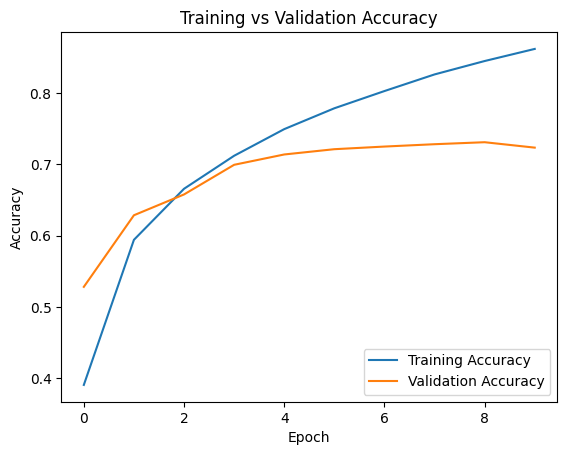

Upload a sample image to test:


Saving dog.jpg to dog (2).jpg


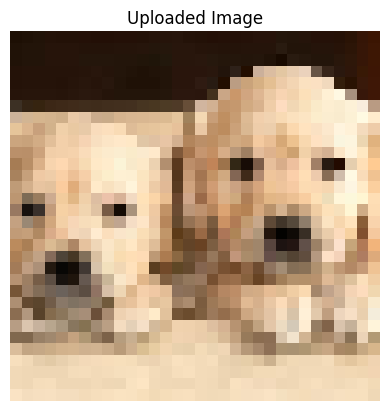

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 278ms/step
Predicted Class: dog


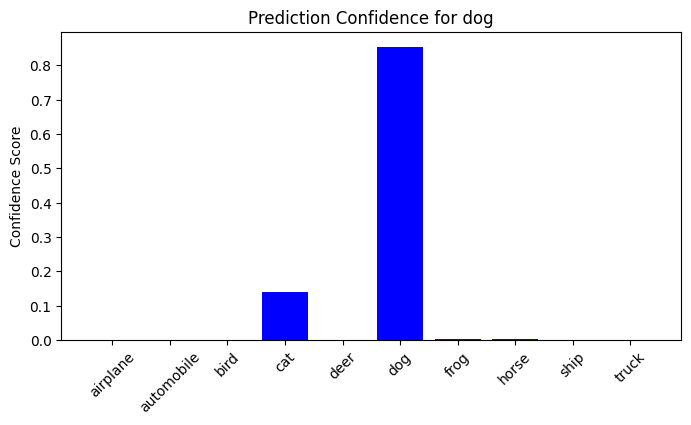

In [ ]:
# Import required libraries
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.utils import load_img, img_to_array
from google.colab import files

# Load and preprocess the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

# Classes in the dataset
class_names = ['airplane', 'automobile', 'bird', 'cat',
               'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Build the CNN model
model = tf.keras.Sequential([
    layers.Conv2D(64, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(256, (3, 3), activation='relu'),
    layers.Conv2D(256, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(10, activation='softmax')  # 10 classes for CIFAR-10
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model for 5 epochs
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

# ----------------------------------------
# **Test the Model with a Custom Image**
# ----------------------------------------

# Upload an image
print("Upload a sample image to test:")
uploaded = files.upload()  # Upload an image from your local machine

for filename in uploaded.keys():
    # Load and preprocess the image
    image = load_img(filename, target_size=(32, 32))  # Resize image to (32x32)
    image_array = img_to_array(image) / 255.0  # Normalize pixel values
    image_array = np.expand_dims(image_array, axis=0)  # Add batch dimension

    # Display the uploaded image
    plt.imshow(image)
    plt.axis('off')
    plt.title("Uploaded Image")
    plt.show()

    # Predict the class of the image
    predictions = model.predict(image_array)
    predicted_class_index = np.argmax(predictions)  # Find the class with highest probability
    predicted_class_name = class_names[predicted_class_index]

    print(f"Predicted Class: {predicted_class_name}")

    # Plot the confidence scores for each class
    plt.figure(figsize=(8, 4))
    plt.bar(class_names, predictions[0], color='blue')
    plt.xticks(rotation=45)
    plt.ylabel("Confidence Score")
    plt.title(f"Prediction Confidence for {predicted_class_name}")
    plt.show()
